In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/khoat/OneDrive - National Economics University/Desktop/1. Study/3.2. Machine Learning 2/data/'

In [33]:
iris_data = pd.read_csv(path + 'iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type'])

In [34]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
iris = iris_data.drop(['type'], axis=1)

In [42]:
iris = iris - iris.mean()

In [44]:
iris

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667
...,...,...,...,...
145,0.856667,-0.054,1.441333,1.101333
146,0.456667,-0.554,1.241333,0.701333
147,0.656667,-0.054,1.441333,0.801333
148,0.356667,0.346,1.641333,1.101333


In [82]:
iris.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


In [86]:
from numpy import linalg as LA
lamb, b = LA.eig(iris.cov())

In [87]:
lamb

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [88]:
b

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

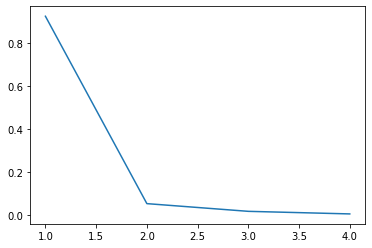

In [90]:
plt.plot(np.arange(1,5), lamb/np.sum(lamb))

In [93]:
b[:,0]

array([ 0.36158968, -0.08226889,  0.85657211,  0.35884393])

In [108]:
B = np.concatenate((b[:,0].reshape(4,1), b[:,1].reshape(4,1)), axis=1)

In [109]:
B

array([[ 0.36158968, -0.65653988],
       [-0.08226889, -0.72971237],
       [ 0.85657211,  0.1757674 ],
       [ 0.35884393,  0.07470647]])

In [158]:
iris_2d = pd.DataFrame(iris.dot(B))
iris_2d.rename(columns={0: 'col1', 1: 'col2'}, inplace=True)
iris_2d['type'] = iris_data.type

In [169]:
iris_2d.head()

,col1,col2,type
0,-2.684207,-0.326607,Iris-setosa
1,-2.715391,0.169557,Iris-setosa
2,-2.889820,0.137346,Iris-setosa
3,-2.746437,0.311124,Iris-setosa
4,-2.728593,-0.333925,Iris-setosa


<AxesSubplot:xlabel='col1', ylabel='col2'>

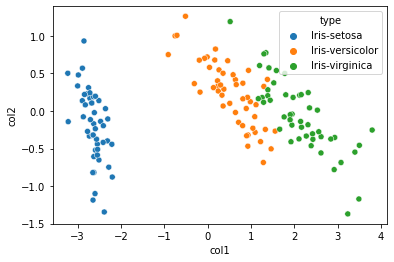

In [168]:
sns.scatterplot(data=iris_2d, x='col1', y='col2', hue='type')

In [110]:
B1 = np.concatenate((b[:,0].reshape(4,1), b[:,1].reshape(4,1), b[:,2].reshape(4,1)), axis=1)

In [111]:
B1

array([[ 0.36158968, -0.65653988, -0.58099728],
       [-0.08226889, -0.72971237,  0.59641809],
       [ 0.85657211,  0.1757674 ,  0.07252408],
       [ 0.35884393,  0.07470647,  0.54906091]])

In [170]:
iris_3d = pd.DataFrame(iris.dot(B1))
iris_3d.rename(columns={0: 'col1', 1: 'col2', 2: 'col3'}, inplace=True)
iris_3d['type'] = iris_data.type

In [171]:
iris_3d.head()

,col1,col2,col3,type
0,-2.684207,-0.326607,-0.021512,Iris-setosa
1,-2.715391,0.169557,-0.203521,Iris-setosa
2,-2.889820,0.137346,0.024709,Iris-setosa
3,-2.746437,0.311124,0.037672,Iris-setosa
4,-2.728593,-0.333925,0.096230,Iris-setosa
...,...,...,...,...
145,1.944017,-0.187415,0.179303,Iris-virginica
146,1.525664,0.375021,-0.120636,Iris-virginica
147,1.764046,-0.078519,0.130784,Iris-virginica
148,1.901629,-0.115877,0.722874,Iris-virginica


In [173]:
import plotly.express as px
fig = px.scatter_3d(iris_3d, x='col1', y='col2', z='col3', color='type')
fig.show()

# Using sklearn

In [119]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new = pca.fit_transform(iris)

In [177]:
converted_2d = pd.DataFrame(new)
converted_2d.rename(columns={0: 'col1', 1: 'col2'}, inplace=True)
converted_2d['type'] = iris_data.type

In [178]:
converted_2d

,col1,col2,type
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa
...,...,...,...
145,1.944017,0.187415,Iris-virginica
146,1.525664,-0.375021,Iris-virginica
147,1.764046,0.078519,Iris-virginica
148,1.901629,0.115877,Iris-virginica


<AxesSubplot:xlabel='col1', ylabel='col2'>

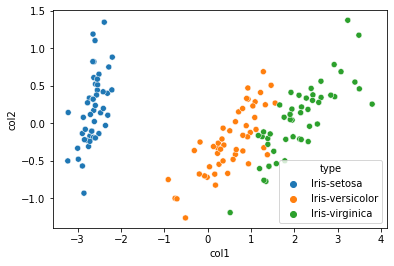

In [179]:
sns.scatterplot(data=converted_2d, x='col1', y='col2', hue='type')

In [133]:
pca1 = PCA(n_components=3)
new1 = pca1.fit_transform(iris)

In [180]:
converted_3d = pd.DataFrame(new1)
converted_3d.rename(columns={0: 'col1', 1: 'col2', 2: 'col3'}, inplace=True)
converted_3d['type'] = iris_data.type

In [181]:
converted_3d

,col1,col2,col3,type
0,-2.684207,0.326607,-0.021512,Iris-setosa
1,-2.715391,-0.169557,-0.203521,Iris-setosa
2,-2.889820,-0.137346,0.024709,Iris-setosa
3,-2.746437,-0.311124,0.037672,Iris-setosa
4,-2.728593,0.333925,0.096230,Iris-setosa
...,...,...,...,...
145,1.944017,0.187415,0.179303,Iris-virginica
146,1.525664,-0.375021,-0.120636,Iris-virginica
147,1.764046,0.078519,0.130784,Iris-virginica
148,1.901629,0.115877,0.722874,Iris-virginica


In [182]:
import plotly.express as px
fig = px.scatter_3d(converted_3d, x='col1', y='col2', z='col3', color='type')
fig.show()